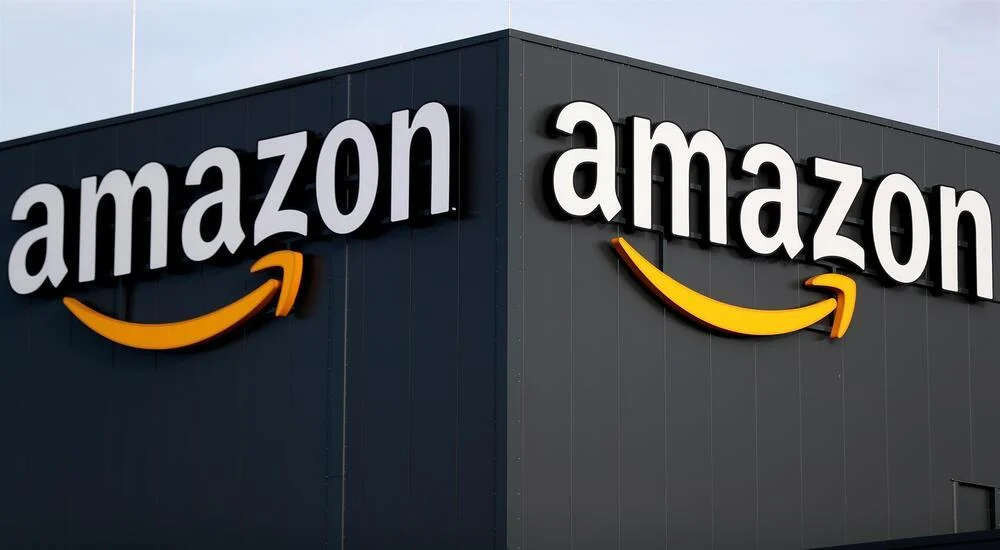

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shutil
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon irket.webp
/kaggle/input/amazon-sales-dataset/amazon.csv


# Uploading a Dataset

In [2]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Data Attributes

In [4]:
def veriözellikleri(dataframe,head=True):
    print("------------------------------------INFO--------------------------------------------")
    print(dataframe.info())
    print("------------------------------------SHAPE-------------------------------------------")
    print(dataframe.shape)
    print("------------------------------------ISNULL------------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("------------------------------------NUNİQUE-----------------------------------------")
    print(dataframe.nunique())
    print("------------------------------------DESCRİBE----------------------------------------")
    display(dataframe.describe())
    if head:
       print("------------------------------------HEAD--------------------------------------------")
       display(dataframe.head())
       print("------------------------------------TAİL--------------------------------------------")
       display(dataframe.tail())

In [5]:
veriözellikleri(df)

------------------------------------INFO--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link           

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


------------------------------------HEAD--------------------------------------------


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


------------------------------------TAİL--------------------------------------------


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


# Editing Data

**Verideki nümerik değerlerin sembollerini çıkararak veriyi kullanabilir hale getirdim.**

**I made the data usable by extracting the symbols of the numerical values ​​in the data.**

In [6]:
df = df.dropna()#eksik değer silme 

In [7]:
data = df.copy()

# Sayısal değerlerden sembolleri kaldırma
df['discounted_price'] = df['discounted_price'].str.replace(r'[^0-9]', '', regex=True)
df['actual_price'] = df['actual_price'].str.replace(r'[^0-9]', '', regex=True)
df['discount_percentage'] = df['discount_percentage'].str.replace(r'[^0-9]', '', regex=True)
df['rating_count'] = df['rating_count'].str.replace(r'[^0-9]', '', regex=True)

df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Variable Assignment

In [8]:
df = df[df['rating'] != '|']# 'rating' sütununda '|' içeren satırları kaldırma df[df['sütun ismi']=='veri içi özellik']

# Değişken Ataması

In [9]:
df["discount_percentage"] = df["discount_percentage"].astype(int)
df["actual_price"] = df["actual_price"].astype(int)
df["discounted_price"] = df["discounted_price"].astype(int)
df["rating"] = df["rating"].astype(float)
df["rating_count"] = df["rating_count"].astype(int)

In [10]:
def veriatama(dataframe):
    cats = [col for col in dataframe.columns if dataframe[col].dtypes not in ['int64','float64']]
    nums = [col for col in dataframe.columns if dataframe[col].dtypes in  ['int64','float64']]
    return cats,nums

In [11]:
cats, nums = veriatama(df)

In [12]:
cats #kategorik değişkenler

['product_id',
 'product_name',
 'category',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

In [13]:
nums#nümerik değişkenler

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

In [14]:
df[df['rating']>4]# rating i 4 den büyük olanlar  

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,17663,499,65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229,299,23,4.3,30411,1m long Type-C USB Cable|Sturdy and Durable. W...,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...","Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,https://m.media-amazon.com/images/I/31XO-wfGGG...,https://www.amazon.in/MI-MTCY001IN-USB-Type-C-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426,999,57,4.1,222,"Make Rich & Creamy Froth In Seconds, Then Say ...","AGK7PREKINHWXGPFNGY22DD3HBKA,AH4R4F2GBWKTYFERO...","Deepak B.,Azhar s.,Yogesh Rajput,Amit V.,Manee...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",https://m.media-amazon.com/images/I/51HzkPoNUz...,https://www.amazon.in/Electric-Handheld-BLACK-...
1455,B00GHL8VP2,USHA 1212 PTC with Adjustable Thermostat Fan H...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",348777,4990,30,4.1,1127,Meant for Spot Heating|Room Size: Upto 15 sq f...,"AECFYIUCHSZXDLACTYPEUSM5DIKA,AF546S43YKYCJWRD7...","Manoj Kumar,Arun Thottakathu Prasannakumar,son...","R1T19FVDX8Z7T2,R1E1AMYN17K7HJ,R20AXB80IQO0DK,R...","I like this product,Simple easy to use, but no...",",Cost effective. This is good for heating your...",https://m.media-amazon.com/im

In [15]:
df[(df["rating"]>2.5)&(df["rating"]<3)]  #r ating değerli  2.5 ve   3 arasında  olanlar  

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281,1999,86,2.8,87,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,499,2199,77,2.8,109,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...
1356,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,161,300,46,2.6,24,Sealing Machine use for snack food saver stora...,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN...","Navin thawani,Amazon Customer,Jemiba Lawrence,...","R3M6NH8U0C7JBM,R32DO8SLNF2JSA,R3U0NCD7XO2KX4,R...","It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Green-Tales-Sealer-Impul...
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199,699,72,2.9,159,Faucet Water Filter: Built-in layered filter c...,"AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...","Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",https://m.media-amazon.com/images/I/41n90w1dlJ...,https://www.amazon.in/IONIX-Tap-Multilayer-Fil...


# Nümerik Değerlerin Görselleştirilemsi 

**(Visualization of Numerical Variables)**
Nümerik değerleri görselleştirirken histogram grafiğinden faydalanıyoruz sayısal değerlerimizi anlamamız  ve dağılımlarına bakmamız  için oldukça önemli bir adım analizimiz için bu grafiklerden faydalanarak aykırı değer,normalliklerine bakıp gereken aykırı değerleri baskılama vb yöntemler uygulayarak yolumuza devam edebiliriz.
Histogram: Değişkenin dağılımını incelemek için.
Boxplot: Aykırı değerleri tespit etmek için.
Scatter Plot: İki değişken arasındaki ilişkiyi görselleştirmek için.
Heatmap: Korelasyon matrisi gibi çoklu ilişkileri göstermek için. Kullanbiliriz.

*********************************************************
**(Visualization of Numerical Variables)**
When visualizing numerical values, we use the histogram graph, it is a very important step for us to understand our numerical values ​​and look at their distribution, we can continue our way by using these graphs for our analysis, looking at their outliers, normalities and applying methods such as suppressing the necessary outliers.
Histogram: To examine the distribution of the variable.
Boxplot: To detect outliers.
Scatter Plot: To visualize the relationship between two variables.
Heatmap: To show multiple relationships such as correlation matrix. We can use it.

In [16]:
nums

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']


**discounted_price** = indirimli fiyat ,**acutal_price** = gerçek fiyat ,**discount_percentage** = indirim yüzdesi,**rating**= derecelendirme ,**rating_count** = derecelendirme sayısı
ısı'

In [17]:
df[nums]

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399,1099,64,4.2,24269
1,199,349,43,4.0,43994
2,199,1899,90,3.9,7928
3,329,699,53,4.2,94363
4,154,399,61,4.2,16905
...,...,...,...,...,...
1460,379,919,59,4.0,1090
1461,2280,3045,25,4.1,4118
1462,2219,3080,28,3.6,468
1463,1399,1890,26,4.0,8031


**Histogram(Nümerik Değişkenler)**

In [18]:
def histplot(dataframe,colname):
    sns.histplot(data=dataframe,x=colname,kde=True)
    plt.title(colname.upper())
    plt.show()
    print("---------------------------------------------------------------------------",end="\n\n")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


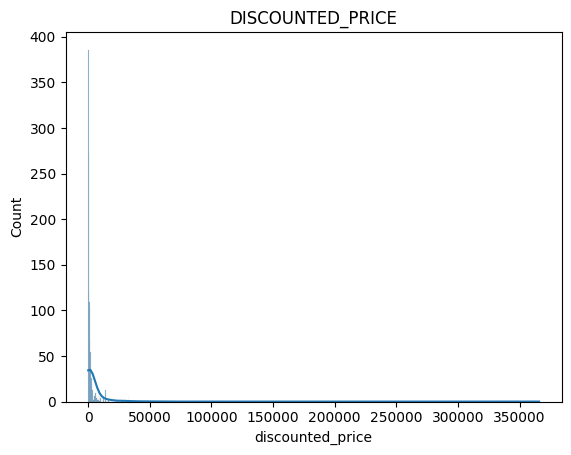

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


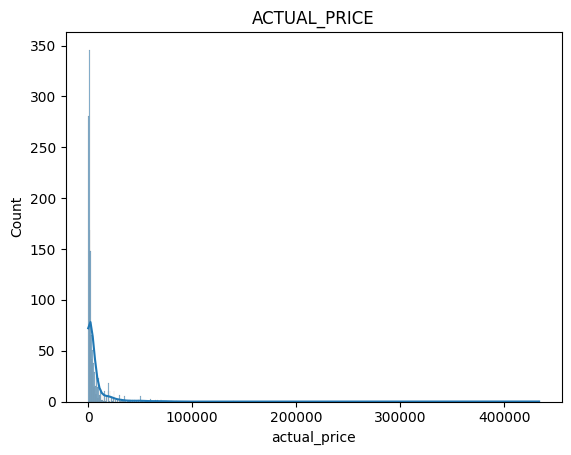

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


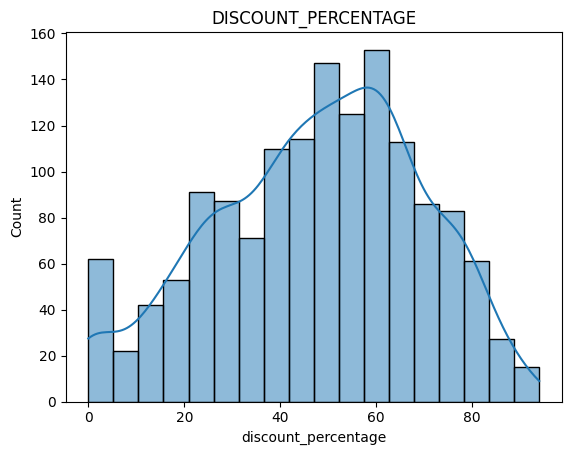

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


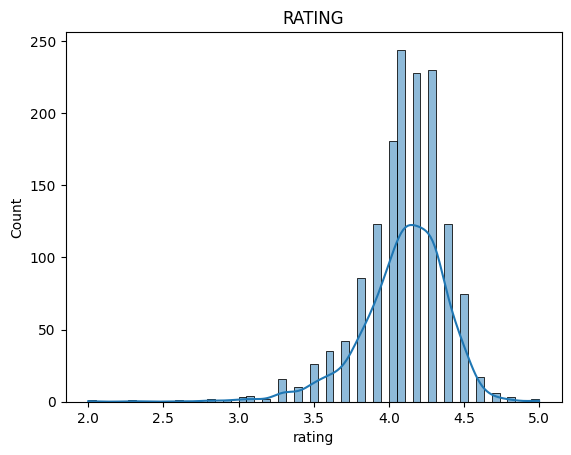

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


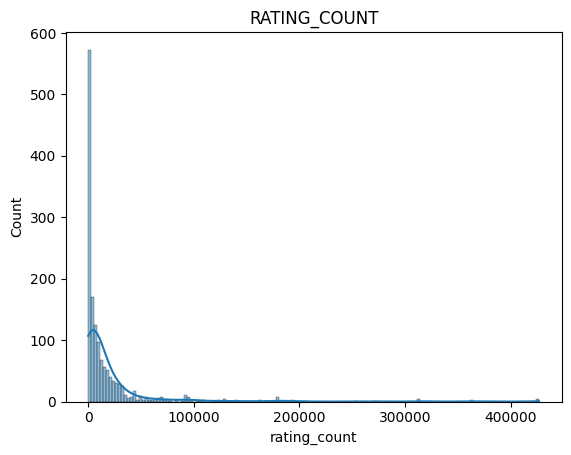

---------------------------------------------------------------------------



In [19]:
for col in nums:
    histplot(df,col)

**Normallik;**
Burda Nümerik değişkelerimize baktığımızda indirim yüzdesi ve derecelendirme oranı  normal dağılım gösterirken (Çan Eğirisi)  ; indirimli fiyat ,gerçek fiyat ve derecelendirme sayısı normal olmayan bir dağılım (Sola Çarpık) oluşturmuş.Sola çarpık histogramlar genelde negatif çarpıklık değerine ve sol tarafta uzun bir kuyruğa sahiptir.
**************************************
**Normality;**
Here, when we look at our numerical variables, while the discount percentage and rating rate show a normal distribution (Bell Curve); the discount price, real price and rating number have an abnormal distribution (Skewed to the Left). Left-skewed histograms generally have a negative skew value and a long tail on the left.

In [20]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Önemli Not**:Kategorik Değişkenler çok fazla sayıda benzersiz değerlerden oluştuğu için görselleştirmedim.

In [21]:
cats

['product_id',
 'product_name',
 'category',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

# Nümerik Değişkenlerin BoxPlot Grafikleri
**(Aykırı Değerleri Görebiliriz)**
# BoxPlot Plots of Numerical Variables
**(We Can See Outliers)**

In [22]:
def boxplot(dataframe,colname):
    sns.boxplot(data=dataframe,x=colname,palette='Set1')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()
    

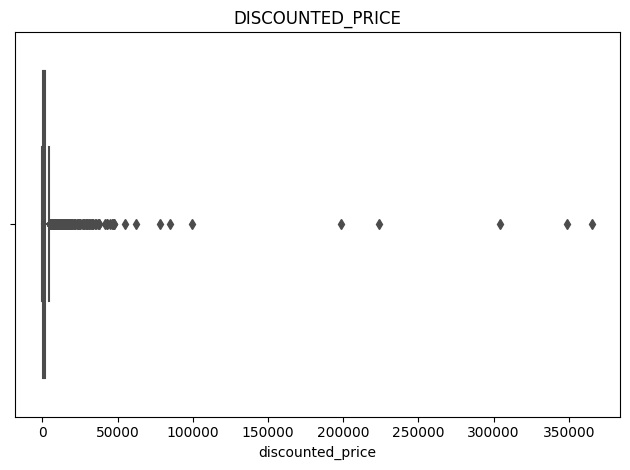

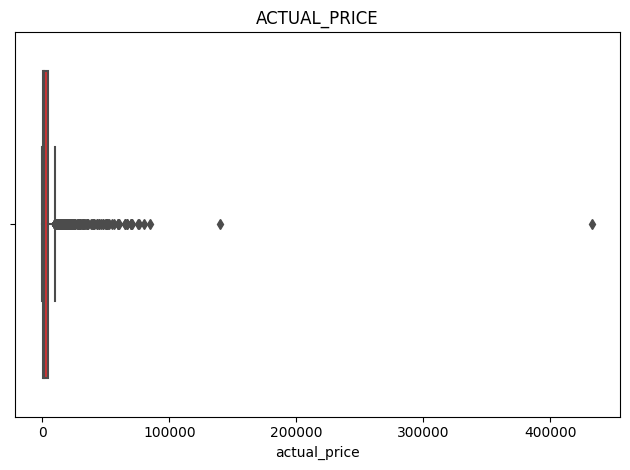

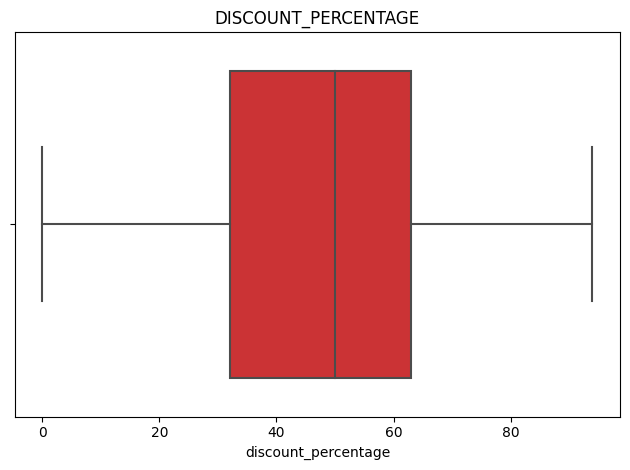

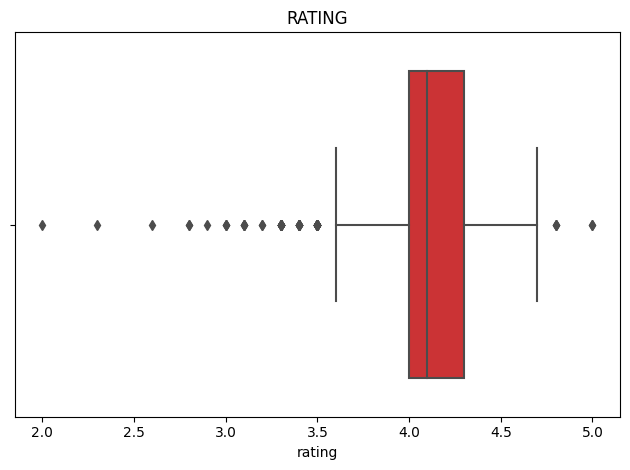

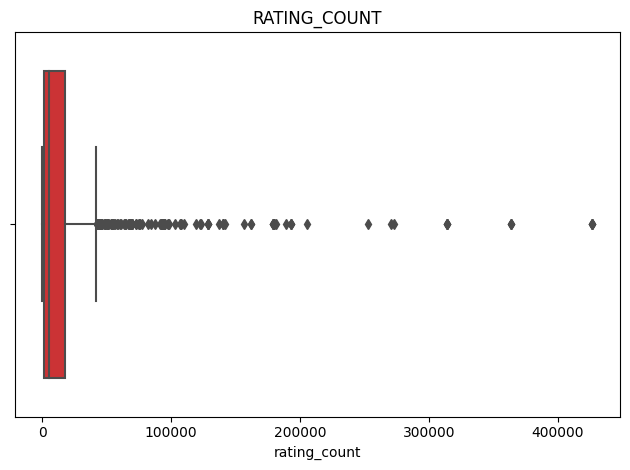

In [23]:
for col in nums:
    boxplot(df,col)

***Aykırı Değer** :İndirim yüzdesi değişkeni dışındaki değişkenlerde (indirimli fiyat ,gerçek fiyat,dereceelendiren kişi sayısı,derecelendirme puanları) aykırı değerler olduğu saptanmıştır.

**Outlier**: It was determined that there were outliers in variables other than the discount percentage variable (discounted price, actual price, number of raters, rating scores).

# Aykırı Değerleri IQR Yöntemi İle Baskılama

In [24]:
def baskıhesabı(dataframe,colname,q1=0.25,q3=0.75):
    quantile1 = dataframe[colname].quantile(q1)
    quantile3 = dataframe[colname].quantile(q3)
    interquantile_range = quantile3-quantile1
    up_limit = quantile3+1.5*interquantile_range
    low_limit = quantile1-1.5*interquantile_range
    return low_limit,up_limit


**Çeyrekaçıklık Hesabı**
**(Quarterly Opening Calculation)**


In [25]:
baskıhesabı(df,nums,q1=0.25,q3=0.75)

(discounted_price       -2310.625
 actual_price           -4685.625
 discount_percentage      -14.500
 rating                     3.550
 rating_count          -23034.625
 dtype: float64,
 discounted_price        4728.375
 actual_price            9959.375
 discount_percentage      109.500
 rating                     4.750
 rating_count           41568.375
 dtype: float64)

**Aykırı Değerleri Baskılama**

In [26]:
def replace_with_thresholds(df, col_name):
    # Alt ve üst sınırları bul
    low_limit, up_limit = baskıhesabı(df, col_name)
    
    # Aykırı değerleri alt ve üst sınırlara çek
    df.loc[df[col_name] < low_limit, col_name] = low_limit
    df.loc[df[col_name] > up_limit, col_name] = up_limit

**Aykırı Değerleri Olan Değişkenlerin Baskılanması**

In [27]:
replace_with_thresholds(df,'discounted_price')
replace_with_thresholds(df,'actual_price')
replace_with_thresholds(df,'rating')
replace_with_thresholds(df,'rating_count')


/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2310.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit
/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4685.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit
/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-23034.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit


**Nümerik Değişkenleri BoxPlot Grafikleriyle Aykırı Değerleri Tekrar Kontrol Ediyoruz.**

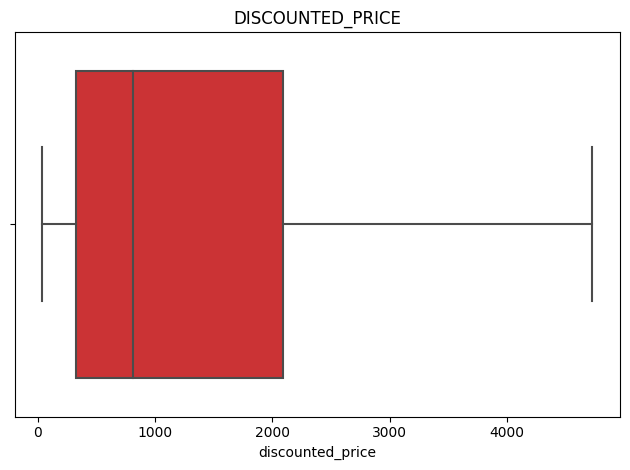

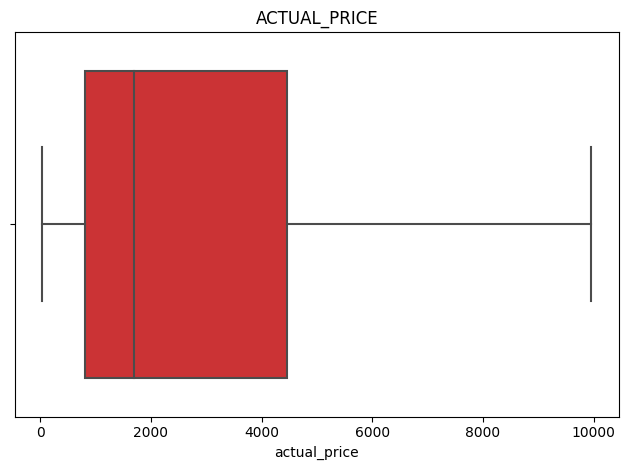

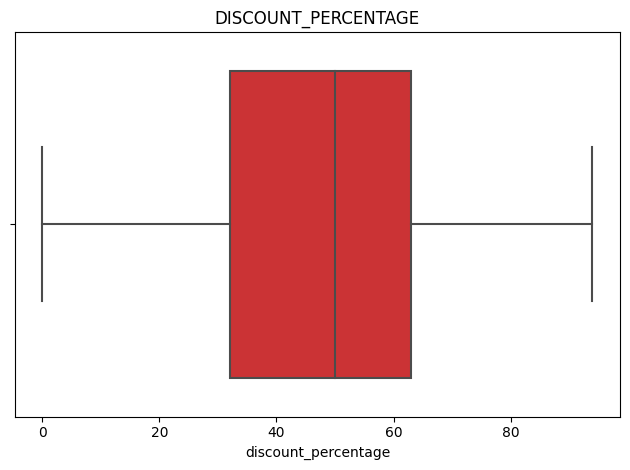

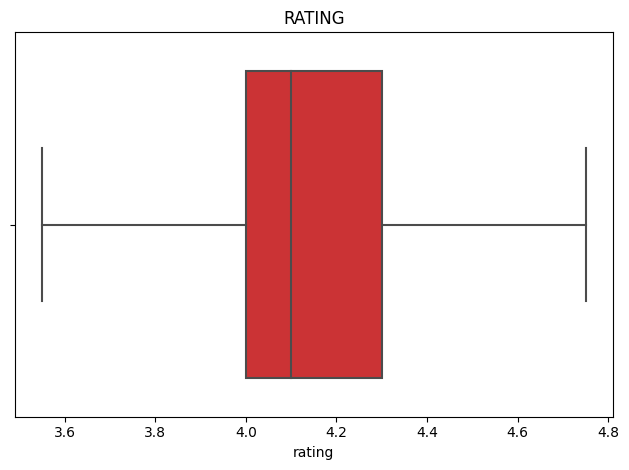

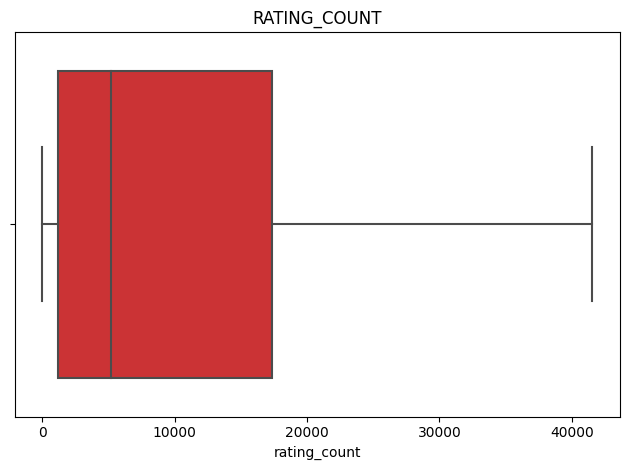

In [28]:
for col in nums:
    boxplot(df,col)

**Aykırı değer nümerik değişkenlerimizde bulunmuyor.**

# Nümerik Değişkenler İçin Analizler

**KDE PLOT**

/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


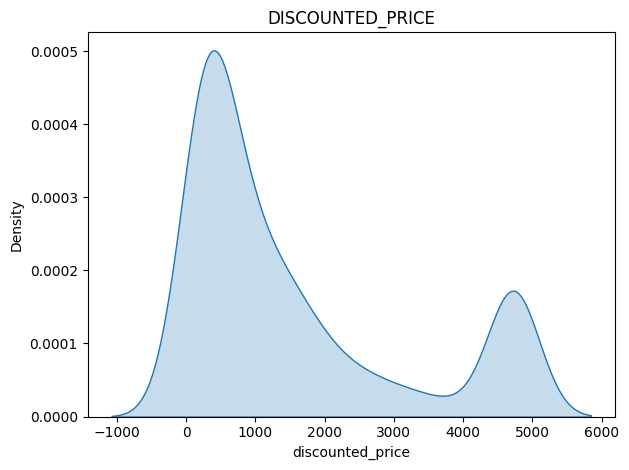

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


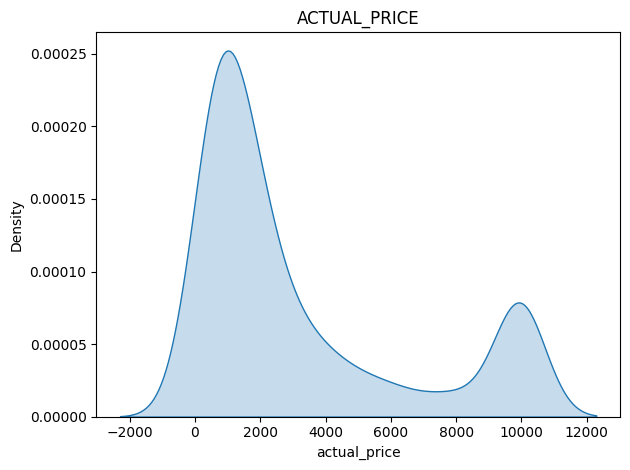

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


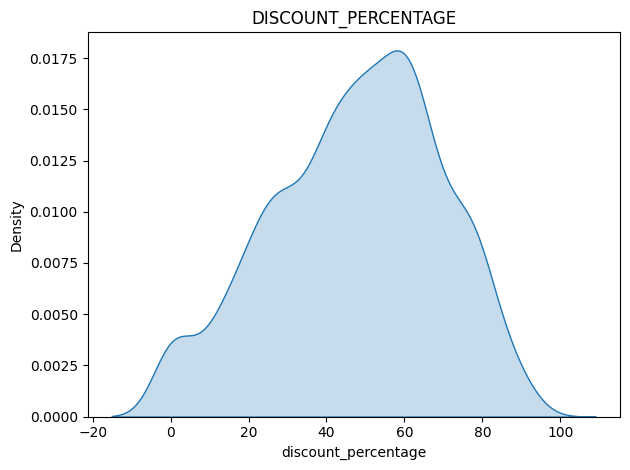

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


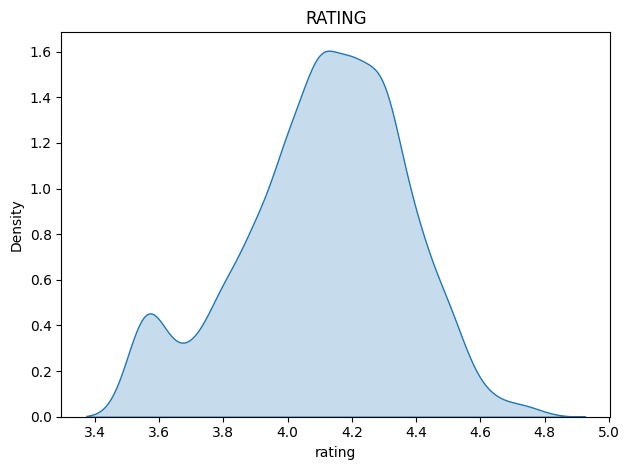

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


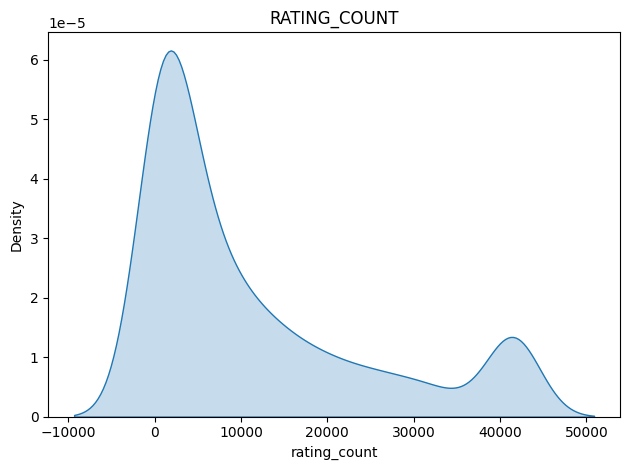

-----------------------------------------------------------



In [29]:
for col in nums:
    sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------",end="\n\n")

**Açıklama**
İndirimli fiyat değişkeni ile gerçek fiyat değişkeni birbirine benzer dağılımlar göstermişler.indirim yüzdesi belli yerde çan eğirisi kıvanıma gelmiş buda verilerin normal dğıldığına bir işaret diyebiliriz çoğu ürün derecelendirilmemiş yani oy kullanmayan insan sayısı fazla bununla beraber derecelendirme  sayıları da normale yakın değerler almış.


The discounted price variable and the real price variable showed similar distributions. The discount percentage has become like a bell curve at a certain point, which is an indication that the data is normally distributed. Most products are not rated, meaning the number of people who did not vote is high, and the rating numbers are also close to normal.**


**ECDF PLOT**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


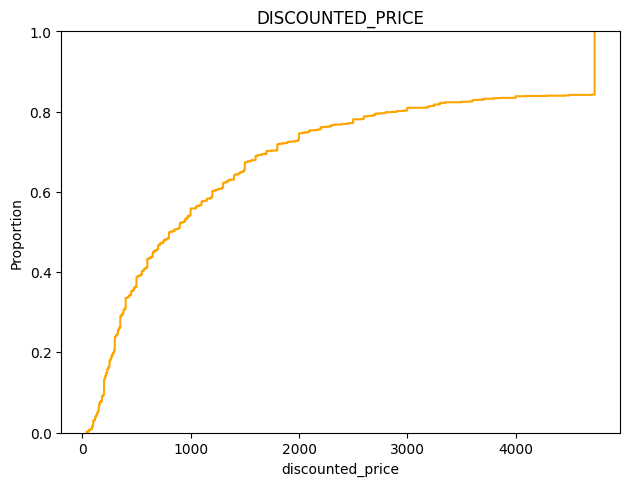

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


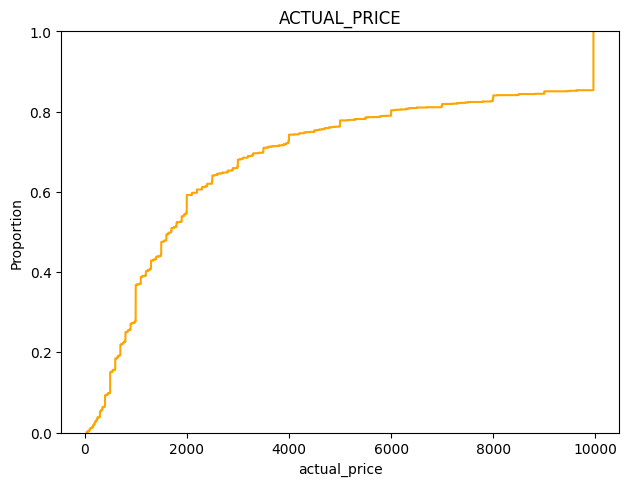

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


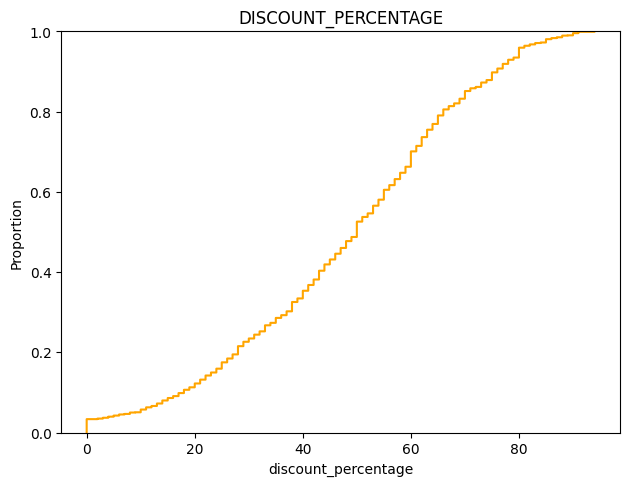

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


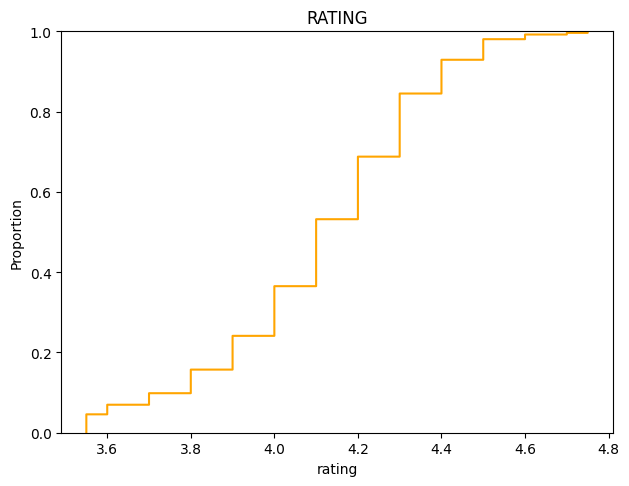

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


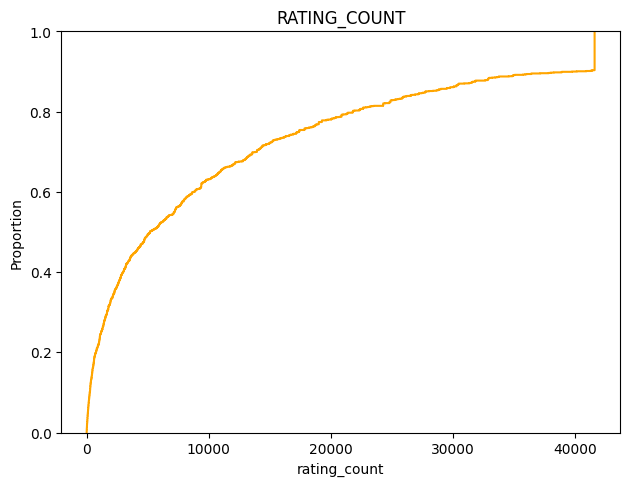

------------------------------------------------



In [30]:
for col in nums:
    sns.ecdfplot(data=df,x=col,color='orange')
    plt.tight_layout()
    plt.title(col.upper())
    plt.show()
    print("------------------------------------------------",end="\n\n")

# KEŞİFSEL VERİ ANALİZİ (EDA)

# İndirimli Fiyat vs Gerçek Fiyat

**indirimli fiyat (discounted_price) ve gerçek fiyat (actual_price) Değişkenleri**

**Fiyat Dağılımı**: Her iki fiyatın dağılımını inceliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


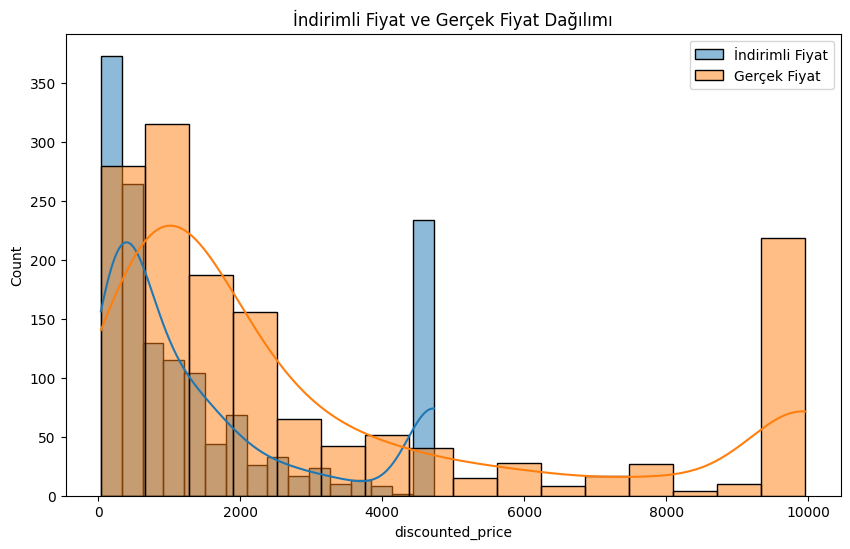

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], kde=True, label='İndirimli Fiyat')
sns.histplot(df['actual_price'], kde=True, label='Gerçek Fiyat')
plt.title('İndirimli Fiyat ve Gerçek Fiyat Dağılımı')
plt.legend()
plt.show()


**indirimli fiyat ve gerçek fiyat arasındaki farklar**


Differences between discounted price and real price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


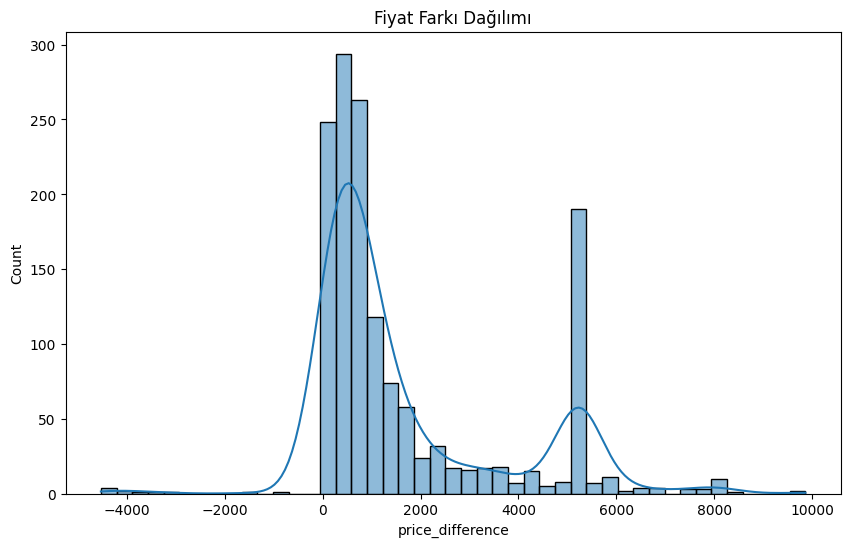

In [32]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_difference'], kde=True)
plt.title('Fiyat Farkı Dağılımı')
plt.show()


**Burdaki farklar aslında indirim oranını tesmil ediyor dieyebiliriz gerçek fiyatı yüksek olup yüksek indirim uygulanan ürünler olabileceği gibi normalden fazla indirim de e uygulanması bir ürüne yüksek tutarda fiyat farkına sebebiyet verebilir.Hatta gerçek fiyat indirimli fiyattan daha düşük olduğu durumlarda olmuş**


We can say that the differences here actually represent the discount rate. There may be products with high real prices and a high discount, but applying a higher than normal discount may also cause a high price difference for a product.

# Derecelendirme Sayısı vs Derecelendirme Puanı

**Alınan Derecelendirme Puanları İle Derecelendirme Sayıları Arasındaki İlişki**


Relationship Between Rating Points Received and Rating Numbers

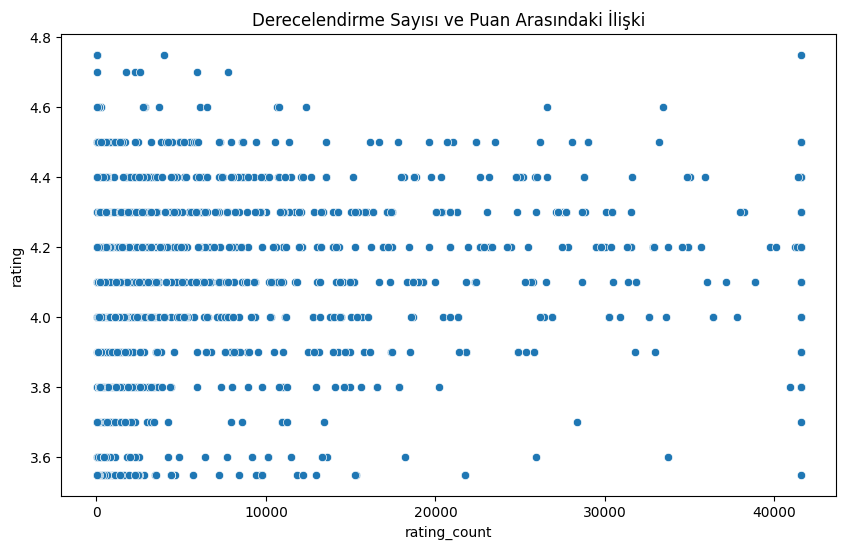

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='rating', data=df)
plt.title('Derecelendirme Sayısı ve Puan Arasındaki İlişki')
plt.show()


**Fazla sayıda değerlendirilen ürün olmadığı spesifik bir yorum yapamamakla beraber  grafik  4.2 derecelendirme puanında yoğunlaşmış durumda**

**Korelasyonları**

Derecelendirme Sayısı ve Puan Arasındaki Korelasyon: 0.16
Korelasyonun Karesi (R²): 0.02


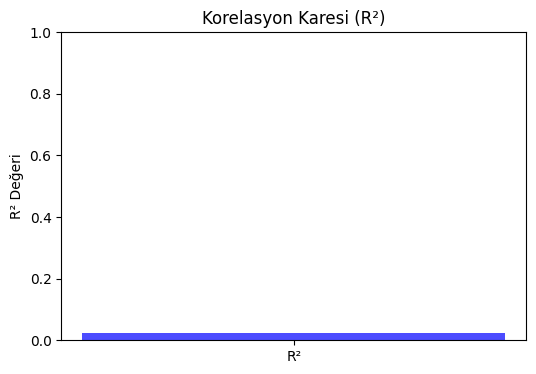

In [34]:
# Korelasyon ve karesi (R^2)
correlation = df['rating_count'].corr(df['rating'])
r_squared = correlation**2
print(f"Derecelendirme Sayısı ve Puan Arasındaki Korelasyon: {correlation:.2f}")
print(f"Korelasyonun Karesi (R²): {r_squared:.2f}")

# R²'yi bar grafiği olarak görselleştirme
plt.figure(figsize=(6, 4))
plt.bar(['R²'], [r_squared], color='blue', alpha=0.7)
plt.title('Korelasyon Karesi (R²)')
plt.ylim(0, 1)
plt.ylabel('R² Değeri')
plt.show()

**Derecelendiren kişi sayısı arttıkca veya azaldıkca derecelendirme puanında belirgin bir değişiklik olmuyor.**


There is no significant change in the rating rate as the number of people rating increases or decreases.

# İndirim Yüzdesi vs Derecelendirme Puanı

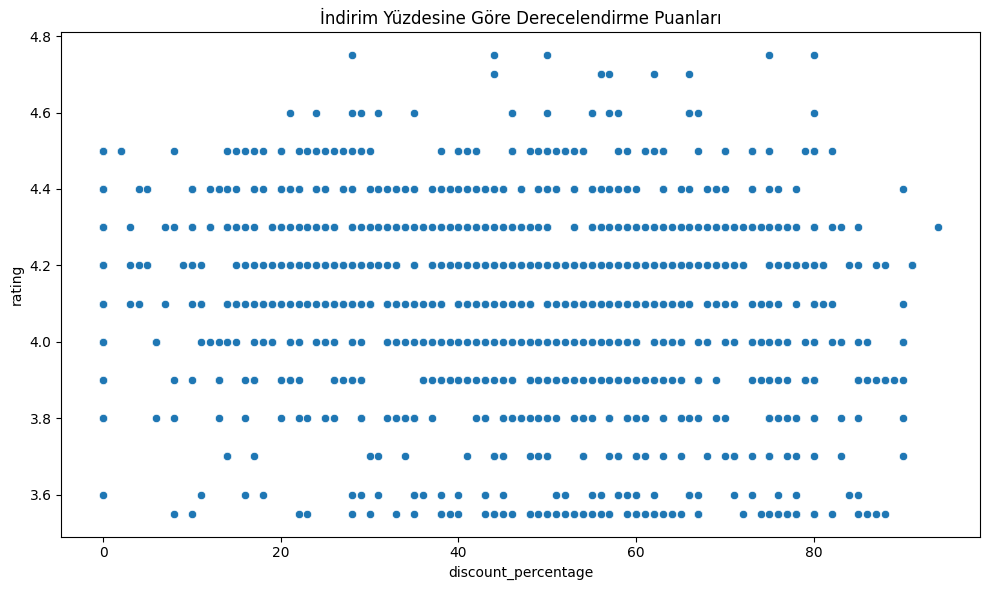

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage',y='rating',data=df)
plt.title("İndirim Yüzdesine Göre Derecelendirme Puanları")
plt.tight_layout()
plt.show()

In [36]:
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Korelasyon Katsayısı:{correlation}")

Korelasyon Katsayısı:-0.15521912565961296



**Oldukça kötü bir korelasyon sonucu yani derecelendirme puanı ile indirimin doğrusal bir bağı ilişkisi yoktur diyebiliriz.**



----------------------



**It is a very bad correlation result, that is, we can say that there is no linear relationship between the rating score and the discount.**


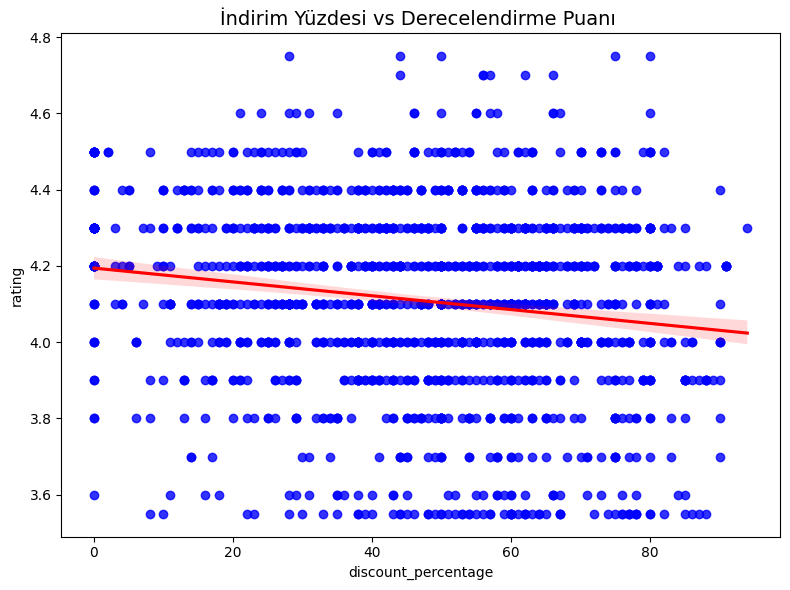

In [37]:
correlation = df['discount_percentage'].corr(df['rating'])

# Dağılım grafiği ve regresyon çizgisi
plt.figure(figsize=(8, 6))
sns.regplot(x='discount_percentage', y='rating', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f"İndirim Yüzdesi vs Derecelendirme Puanı ", fontsize=14)
plt.tight_layout()
plt.show()

**Dağılım Grafiği**
**Regresyon Çizgisi**:  doğrusal regresyon çizgisi kırmızı renkte
**Korelasyon Bilgisi**: üst kısmına korelasyon katsayısı 

# İndirim Yüzedesi vs Derecelendiren Kişi Sayısı

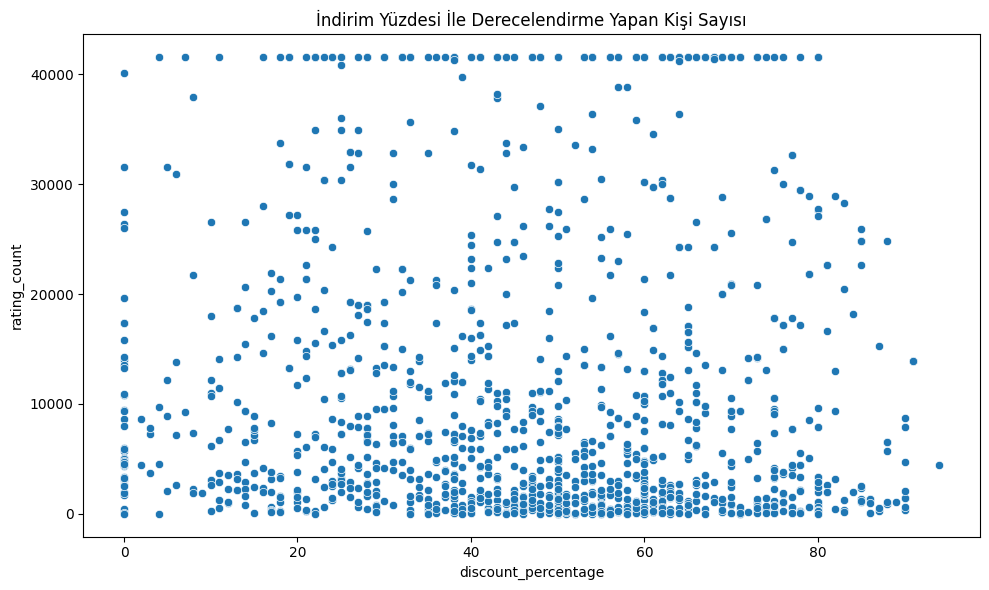

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage',y='rating_count',data=df)
plt.title(f"İndirim Yüzdesi İle Derecelendirme Yapan Kişi Sayısı")
plt.tight_layout()
plt.show()

**Dağılımlara bakıtığımızda iki  dağılımın birbirine benzerlik gösterdiğini söyleyemeyiz ve genellikle  yüzde 40 ile 60 arası indirim yapılan ürünlerin  derecelendirilme sayıları  fazla  olduğunu söyleyebiliriz**.

--------------------------------

**When we look at the distributions, we cannot say that the two distributions are similar to each other and we can say that the number of ratings is generally higher for products with a discount of 40 to 60 percent**.


In [39]:
correlation =  df['discount_percentage'].corr(df['rating_count'])
print(f"Korelasyon Sayısı:{correlation}")

Korelasyon Sayısı:-0.03362180005539111


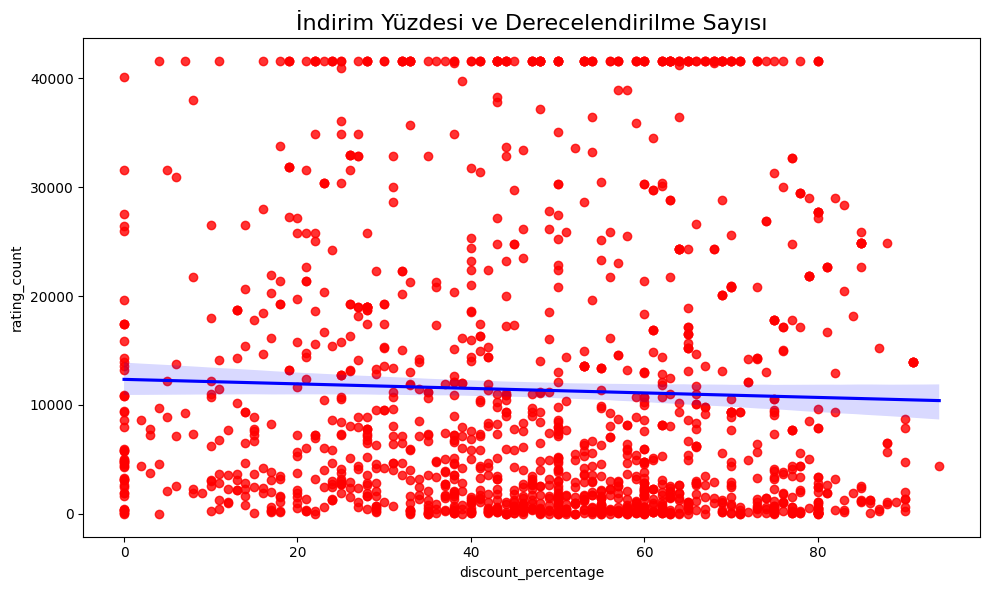

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x='discount_percentage',y='rating_count',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title(f"İndirim Yüzdesi ve Derecelendirilme Sayısı",fontsize=16)
plt.tight_layout()
plt.show()

**İndirim yüzdesi ile derecelendirme yapan kişi  sayısı  dağılımları arasında bir benzerik olmadığı görünüyor ve  bununla beraber korelasyon sonucununda oldukça düşük çıkmıştır.Dağılım grafiği ve Regresyon Çizgisi üstte yer  almıştır**.

----------------------------

**There seems to be no similarity between the distribution of the discount percentage and the number of people who rated, and the correlation result is also quite low. The distribution graph and the Regression Line are above**.

# İndirimli Fiyat vs Derecelendirme Puanı

In [41]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"Korelasyon Sayısı:{correlation}")

Korelasyon Sayısı:0.08994307831225262


<function matplotlib.pyplot.show(close=None, block=None)>

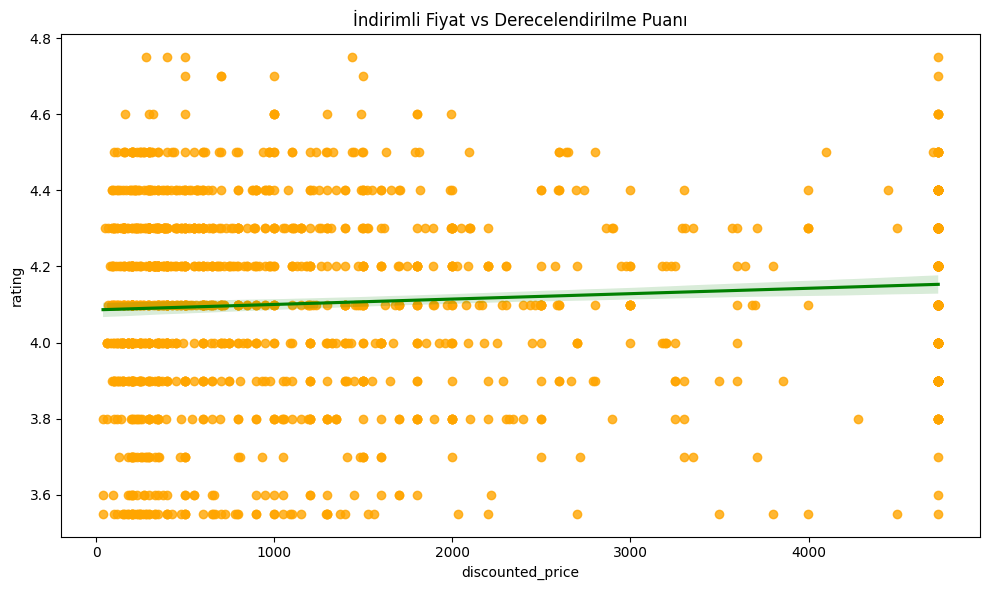

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x='discounted_price',y='rating',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})
plt.title(f"İndirimli Fiyat vs Derecelendirilme Puanı")
plt.tight_layout()
plt.show

**İndirim Tutarı ve Derecelendirme Puanı değişkenlerinin korelasyonlarına,regresyon çizgisine ve dağılım grafiğine baktığımızda dağılımlarda herhangi bir benzerlik görülmemekle  beraber korelasyon sayısı da  çok düşük gelmiştir**

-------------------------------------------

**When we look at the correlations, regression line and distribution graph of the Discount Amount and Rating Score variables, there is no similarity in the distributions and the correlation number is also very low**

# Nümerik Değişkenlerin  Korelasyonları

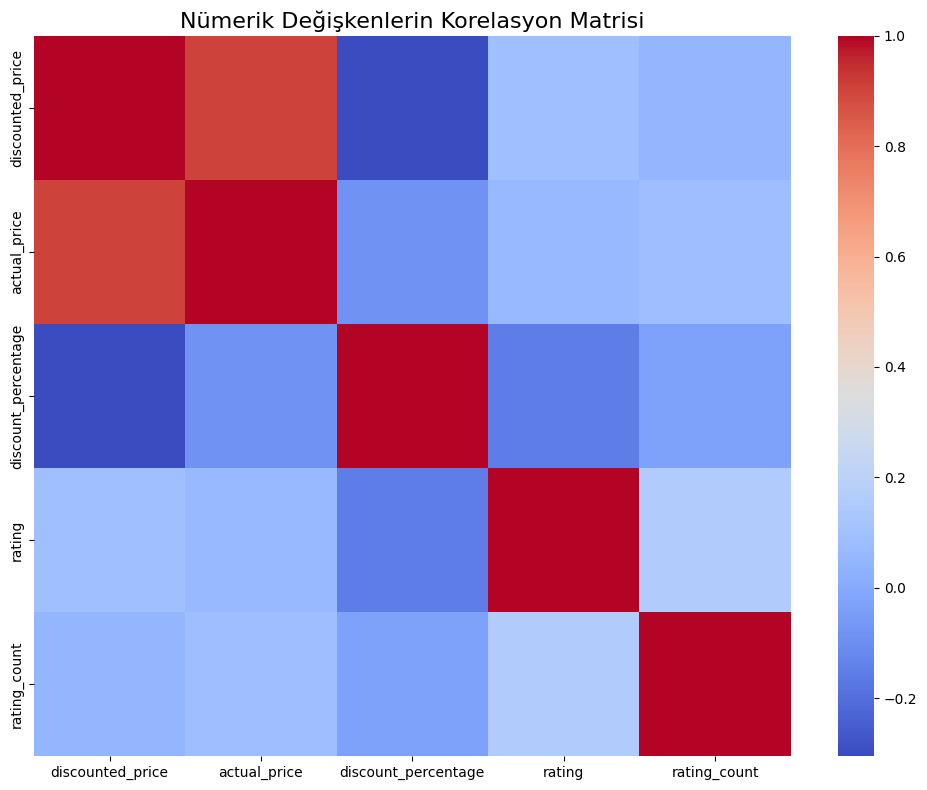

In [43]:
correlation_matrix =df[nums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt=".2f")
plt.title("Nümerik Değişkenlerin Korelasyon Matrisi",fontsize=16)
plt.tight_layout()
plt.show()

**Korelasyon Matrisine baktığımızda indirimli fiyat ve gerçek fiyat değişkeni arasında pozitif bir ilişki olduğunu görüyoruz bunun dışında pozitif bir ilişki durumu yoktur**.


--------------------------------------------

**When we look at the Correlation Matrix, we see that there is a positive relationship between the discounted price and the real price variable, but there is no other positive relationship**.

In [44]:
df[cats]

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",International design and styling|Two heat sett...,"AGVPWCMAHYQ

# Veri Kontrol

# Data Control

**Eksik Veya Tekrarlayan Veri Yok**.

-----------------------------------------------

**No Missing or Duplicate Data**.

In [45]:
# Eksik verileri kontrol et
print(df.isnull().sum())

# Tekrarlayan verileri kontrol et
print(df.duplicated().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
price_difference       0
dtype: int64
0


In [46]:
df1 = df.copy

# Target Encoding

**groupby ile Ortalama Hesaplama: category değişkenindeki her bir kategori için hedef değişkenin (rating) ortalama değerini hesapladık.
map ile Kategorilere Karşılık Gelen Değerleri Atama: map fonksiyonu, category sütunundaki her değere karşılık gelen ortalama değeri atar. Bu işemlerle Category değişkenini Derecelendirme puanları ortalamalarına göre nümerik hale getirdik**.


-------------------------------------------

**Calculating Average with groupby: We calculated the average value of the target variable (rating) for each category in the category variable. Assigning Values ​​Corresponding to Categories with map: The map function assigns the average value corresponding to each value in the category column. With these operations, we made the Category variable numeric according to the average rating scores**.

In [47]:
category_mean=df.groupby('category')['rating'].mean()
df['category_encoded'] = df['category'].map(category_mean)

In [48]:
df[['category','category_encoded']]

,category,category_encoded
0,Computers&Accessories|Accessories&Peripherals|...,4.154545
1,Computers&Accessories|Accessories&Peripherals|...,4.154545
2,Computers&Accessories|Accessories&Peripherals|...,4.154545
3,Computers&Accessories|Accessories&Peripherals|...,4.154545
4,Computers&Accessories|Accessories&Peripherals|...,4.154545
...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,3.977273
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3.960000
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.700000
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4.100000


**Burda her kategorinin ortalamalarını yuvarlamamamın sebebi fazla sayıda benzersiz değer (nunique) elde edip böylelikle ilerleyen süreçte modeli Overfitting riskine karşı korumuş oluyorum bu ondalık sayıları round() fonksiyonuyla halledebilirdim kategorilerin ayırt edilmesi açısından da önemli**.

-----------------------------------------------
**The reason I do not round the averages of each category here is that I obtain a large number of unique values ​​(nuniques) and thus protect the model against the risk of overfitting in the future. I could have handled these decimal numbers with the round() function**.

In [49]:
df[['category','category_encoded']].nunique()

category            211
category_encoded     93
dtype: int64

# Feature Engineering (Özellik Mühendisliği)

**Fiyat Farkı = Gerçek Fiyat - İndirimli Fiyat**

**Ağırlıklı Derecelendirme = Derecelendirme Puanı * Derecelendirme Sayısı**

-------------------------------------------
Price Difference = Actual Price - Discounted Price

Weighted Rating = Rating Point * Number of Ratings



In [50]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
df['weighted_rating'] = df['rating'] * df['rating_count']

In [51]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_difference,category_encoded,weighted_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.000,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,4.154545,101929.800
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,41568.375,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,4.154545,166273.500
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.000,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,4.154545,30919.200
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,41568.375,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,4.154545,174587.175
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.000,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,4.154545,71001.000


**Fiyat Farkı ve Ağırlıklı Derecelendirme  yeni özellik olarak veri setimize eklenerek bu değişkenlerin derecelendirme puan sınıfı  tahmini üzerinde etkisini göreceğiz**

In [52]:
df[['price_difference','weighted_rating']]

,price_difference,weighted_rating
0,700.0,101929.800
1,150.0,166273.500
2,1700.0,30919.200
3,370.0,174587.175
4,245.0,71001.000
...,...,...
1460,540.0,4360.000
1461,765.0,16883.800
1462,861.0,1684.800
1463,491.0,32124.000


In [53]:
df[['price_difference','weighted_rating']].nunique()

price_difference     576
weighted_rating     1114
dtype: int64

# Hedef Değişken Belirleme

---------------------------------------------------

# Determining Target Variables

Makine öğrenmesi için bir hedef değişken (target) belirlemeniz gerekiyor. 
Kategori tahmini: **category (hedef değişken)**


**Rating sınıflandırması**: Rating değerini sınıflara böldük (düşük, orta, yüksek).

---------------------------------------------

**Low: 0-3 arasındaki rating değerleri**
**Medium: 3-4 arasındaki rating değerleri**
**High: 4-5 arasındaki rating değerleri**

------------------------------------------------

You need to specify a target variable for machine learning.

Category prediction: **category (target variable)**

**Rating classification**: We divided the rating value into classes (low, medium, high).

---------------------------------------------

**Low: Rating values ​​between 0-3**
**Medium: Rating values ​​between 3-4**
**High: Rating values ​​between 4-5**
 


In [54]:
df['rating_class'] = pd.cut(df['rating'],bins=[0,3,4,5],labels=['Low', 'Medium', 'High'])

In [55]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_difference,category_encoded,weighted_rating,rating_class
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.000,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,4.154545,101929.800,High
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,41568.375,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,4.154545,166273.500,Medium
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.000,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,4.154545,30919.200,Medium
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,41568.375,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,4.154545,174587.175,High
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.000,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,4.154545,71001.000,High


# MODEL OLUŞTURMA

**Model, verilen sayısal özelliklere ve diğer bağımsız değişkenlere dayanarak, her bir ürün için rating değerinin hangi sınıfa ait olduğunu tahmin etmeye çalışır**.

Yani, model rating değerini doğrudan tahmin etmek yerine, rating değerini sınıflandırarak hangi sınıfta (Low, Medium, High) olduğunu tahmin eder. Bu şekilde, model çok fazla farklı sayısal değer yerine sadece üç kategori ile sınıflandırma yapar

# CREATING A MODEL

**The model tries to predict which class the rating value belongs to for each product based on the given numerical features and other independent variables**.


That is, instead of directly predicting the rating value, the model predicts which class (Low, Medium, High) the rating value falls into by classifying it. In this way, the model classifies with only three categories instead of many different numerical values

**Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi**

X: Bağımsız değişkenlerdir. Burada nums (yani sayısal değişkenler) ve price_difference(Fiyat Farkı) ile weighted_rating(Ağırlıklı Derecelendirme)kullanılıyor.

y: Bağımlı değişken (hedef değişken). Burada, rating_class yani rating'in sınıflandırılmış hali kullanılıyor.

-------------------------------------------

X: Independent variables. Here, nums (i.e. numeric variables) and price_difference (Price Difference) and weighted_rating (Weighted Rating) are used.

y: Dependent variable (target variable). Here, rating_class, i.e. the classified version of rating, is used.

In [56]:
X = df[ nums + ['price_difference', 'weighted_rating']]
y = df['rating_class']

**Veri Setini Eğitim ve Test Olarak Ayırma**

--------------------------------
**Splitting the Dataset into Training and Test**

**Veri seti, %80 eğitim ve %20 test olmak üzere ikiye ayrılıyor. train_test_split fonksiyonu, eğitim verilerini modelin öğrenmesi için, test verilerini ise modelin doğruluğunu değerlendirmek için ayırır.**


--------------------------------------

**The dataset is divided into two parts: 80% training and 20% testing. The train_test_split function separates the training data for the model to learn and the test data for evaluating the accuracy of the model**.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Oluşturma ve Eğitme**

----------------------------------------
**Creating and Training a Model**

RandomForestClassifier: Rastgele Orman sınıflandırıcı modelini oluşturuyoruz. Bu model, birçok karar ağacından (decision trees) oluşan bir ansambldır.
model.fit(X_train, y_train): Eğitim verisi ile modeli eğitiyoruz. Yani, model X_train (bağımsız değişkenler) ve y_train (sınıflandırılmış rating) ile öğrenme yapacak.


-------------------------------------------
RandomForestClassifier: We are creating a Random Forest classifier model. This model is an assembly of many decision trees.

model.fit(X_train, y_train): We are training the model with training data. That is, the model will learn with X_train (independent variables) and y_train (classified rating).


In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

**Modelin Doğruluğunu Hesaplama**

----------------------------
**Calculating Model Accuracy**

In [59]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


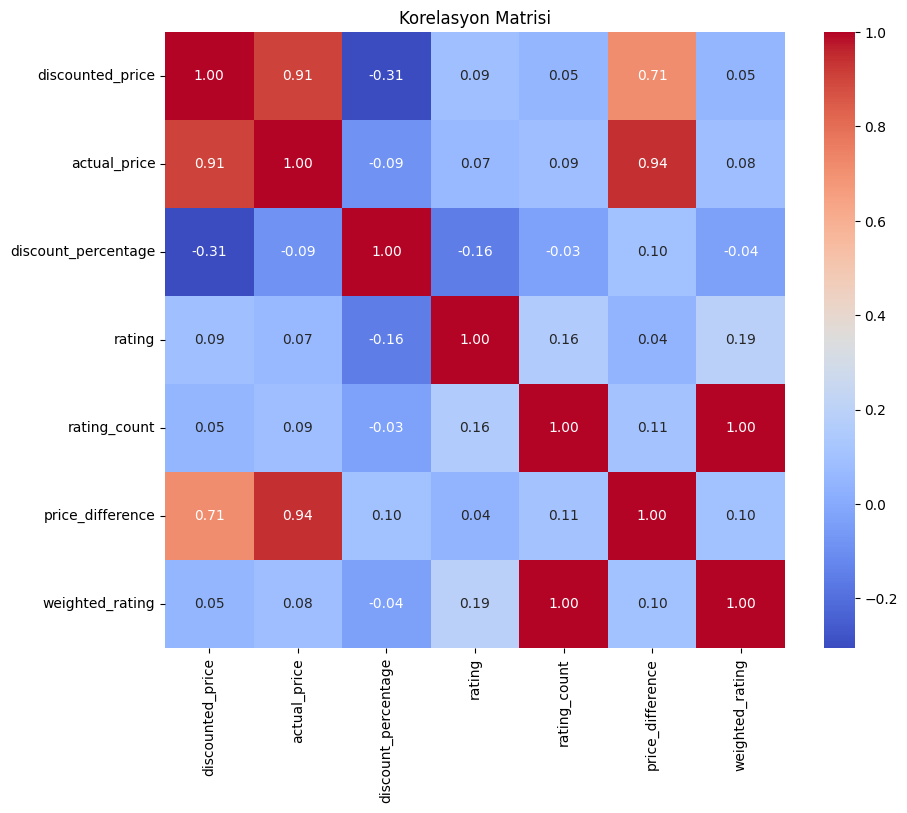

In [60]:
# Korelasyon matrisi
correlation_matrix = df[nums + ['price_difference', 'weighted_rating']].corr()

# Isı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# Çapraz doğrulama (cross-validation)

**Çapraz doğrulama (cross-validation), modelin doğruluğunu daha güvenilir bir şekilde değerlendirmek için kullanılır. Bu yöntem, veri setini k katına (örneğin 5 veya 10 kat) böler ve modelin her bir bölme üzerindeki performansını hesaplar**.

In [61]:

model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5 katlı çapraz doğrulama


print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


**Açıklama:**
Accuracy: Doğru tahminlerin toplam tahminlere oranını verir.
Precision (Kesinlik): Pozitif tahminlerin ne kadarının doğru olduğunu gösterir.
Recall (Duyarlılık): Gerçek pozitif örneklerin ne kadarını doğru tahmin ettiğimizi gösterir.
F1-Score: Precision ve Recall'un harmonik ortalaması. Dengesiz veri setlerinde daha anlamlıdır.
Classification Report: Precision, Recall, F1-Score ve sınıflara göre destek (support) değerlerini detaylıca gösterir.

In [62]:
# Çapraz doğrulama tahminleri
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# 1. Doğruluk (Accuracy)
accuracy = accuracy_score(y, y_pred_cv)
print("Accuracy:", accuracy)

# 2. Precision (Kesinlik)
precision = precision_score(y, y_pred_cv, average='weighted')  # Ortalama türü: weighted
print("Precision:", precision)

# 3. Recall (Duyarlılık)
recall = recall_score(y, y_pred_cv, average='weighted')
print("Recall:", recall)

# 4. F1-Score
f1 = f1_score(y, y_pred_cv, average='weighted')
print("F1-Score:", f1)

# 6. Detaylı Classification Report
print("\nClassification Report:\n")
print(classification_report(y, y_pred_cv))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       928
      Medium       1.00      1.00      1.00       534

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



In [63]:
model = RandomForestClassifier(
    max_depth=5,  # Maksimum ağaç derinliğini sınırladık
    min_samples_split=10,  # Split için minimum örnek sayısını artırdık
    random_state=42
)
print(model)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)


In [64]:

# İlk olarak, verinin %20'sini tamamen test seti olarak ayırdık
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kalan verinin %20'sini doğrulama seti, geri kalanını eğitim seti yaptık
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # %20 doğrulama


In [65]:


# Modeli oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Doğrulama setindeki doğruluğu hesapla
val_accuracy = model.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 1.0


In [66]:
# Test setinde modelin doğruluğunu hesapla
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


In [67]:

# Test setindeki tahminleri al
y_pred = model.predict(X_test)

# Performans raporu oluştur
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       175
      Medium       1.00      1.00      1.00       118

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [68]:
print(y.value_counts(normalize=True))  # Sınıf oranlarını görmek için


rating_class
High      0.634747
Medium    0.365253
Low       0.000000
Name: proportion, dtype: float64


In [69]:
df = df[df['rating_class'].isin(['High', 'Medium'])]
X = df[nums + ['price_difference', 'weighted_rating']]
y = df['rating_class']


In [70]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       175
      Medium       1.00      1.00      1.00       118

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



# SONUÇ
# RESULT

**Modelin doğruluk skoru %100 Yani modelimiz kategorilerin hangi puan sınıfına ait olduğunu sıkıntısız bir şekilde tahmin etmiştir**

In [71]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_difference,category_encoded,weighted_rating,rating_class
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.000,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,4.154545,101929.800,High
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,41568.375,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,4.154545,166273.500,Medium
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.000,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,4.154545,30919.200,Medium
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,41568.375,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,4.154545,174587.175,High
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.000,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,4.154545,71001.000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.000,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,540.0,3.977273,4360.000,Medium
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.000,"230 Volt

# Gerçek Fiyat Tahmini İçin Random Forest Regressor
-----------------------------------------------------
# Random Forest Regressor for Real Price Prediction

**Gerçek fiyatı tahmin etmek için hedef değişkeniniz actual_price . Bu, sürekli bir sayısal değerdir ve regresyon problemi için uygundur**.

--------------------------------------------------
**To predict the actual price, your target variable is actual_price . This is a continuous numeric value and is suitable for a regression problem**.


# Değişkenler(Variables)

In [72]:
nums

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

**actual_price yani ürünün gerçek fiyatını tahmin ettiğimizden dolayı yeni bir liste oluşturmamız gerekiyor**
**Açıklamalar**:

--------------------------------------------------


Bağımsız Değişkenler (X): Fiyatı tahmin etmeye yardımcı olacak tüm diğer sütunları içerir. 
indirimli fiyat(discounted_price), kategori_kodlanmış(category_encoded), ağırlıklı_derecelendirme(weighted_rating), derecelendirme(rating), derecelendirme_sayısı(rating_count)

Bağımlı Değişken(y)**: Gerçek fiyat olan (actual_price)'ı tahmin etmeye çalışıyoruz.





In [73]:
features = ['discounted_price', 'category_encoded', 'weighted_rating', 'rating', 'rating_count']

In [74]:
df[features]

,discounted_price,category_encoded,weighted_rating,rating,rating_count
0,399.0,4.154545,101929.800,4.2,24269.000
1,199.0,4.154545,166273.500,4.0,41568.375
2,199.0,4.154545,30919.200,3.9,7928.000
3,329.0,4.154545,174587.175,4.2,41568.375
4,154.0,4.154545,71001.000,4.2,16905.000
...,...,...,...,...,...
1460,379.0,3.977273,4360.000,4.0,1090.000
1461,2280.0,3.960000,16883.800,4.1,4118.000
1462,2219.0,3.700000,1684.800,3.6,468.000
1463,1399.0,4.100000,32124.000,4.0,8031.000


In [75]:
# Bağımsız ve bağımlı değişkenlerin belirlenmesi
X = df[features] # Bağımsız değişkenler
y = df['actual_price']  # Hedef değişken

**Veriyi Eğitim Seti ve Test Seti Olarak Ayırma**

In [76]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Oluşturma

---------------------
# Creating a Model


**Eğitim ve Test Seti: Verinizi train_test_split ile eğitim ve test olarak ayırıyoruz. Bu sayede model, eğitim setinde öğrenir ve test setinde doğruluğu değerlendirilir.Model Değerlendirmesi: mean_absolute_error, mean_squared_error, root_mean_squared_error, ve r2_score metrikleri modelin başarısını değerlendirmek için kullanılır**
.

In [77]:
# Model oluşturma
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin doğruluğunu değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 544.5692929217754
Mean Squared Error: 951813.5951140627
Root Mean Squared Error: 975.6093455446512
R-squared: 0.9012293647162761


# SONUÇ/RESULT

**Mean Absolute Error (MAE): 544.57**

Ortalama mutlak hata yaklaşık 545 birim. Bu, modelin tahminleri ile gerçek değerler arasındaki farkların ortalama büyüklüğünü gösteriyor. Bu değer önceki modele göre oldukça yüksek.

----------------------------------------------------------------------
**Mean Squared Error (MSE): 951813.60**

Ortalama kare hata, modelin tahminlerinin karelerinin ortalamasıdır ve burada çok yüksek bir değer elde edilmiş. Bu da modelin bazı tahminlerde oldukça büyük hatalar yaptığını gösteriyor.

---------------------------------------------------------------------
**Root Mean Squared Error (RMSE): 975.61**

Kök ortalama kare hata, MSE'nin kareköküdür ve burada 975.6 birimlik bir hata var. Bu, modelin tahminleri ile gerçek değerler arasındaki farkların önemli ölçüde büyük olduğunu gösterir.

--------------------------------------------------------------------
**R-squared (R²): 0.9012**

R-kare, modelin bağımlı değişkenin (gerçek fiyat) varyansını ne kadar açıkladığını gösterir. Burada 0.9012, modelin %90.12 oranında doğru tahminler yaptığına işaret eder, bu yine oldukça iyi bir değer.

# Gerçek ve Tahmin Edilen Fiyatların Karşılaştırılması

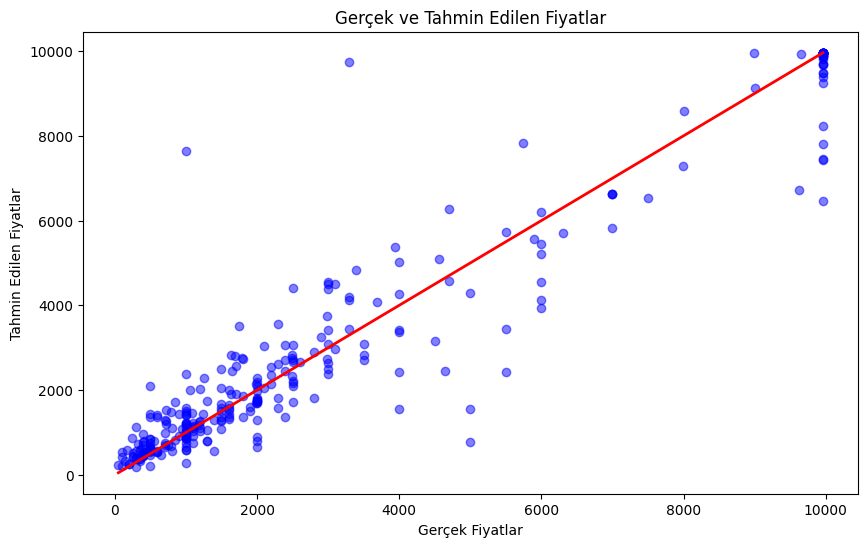

In [79]:
# Gerçek ve tahmin edilen değerleri alın
y_pred = model.predict(X_test)

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Gerçek ve Tahmin Edilen Fiyatlar')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.show()

# Hata Hesaplama

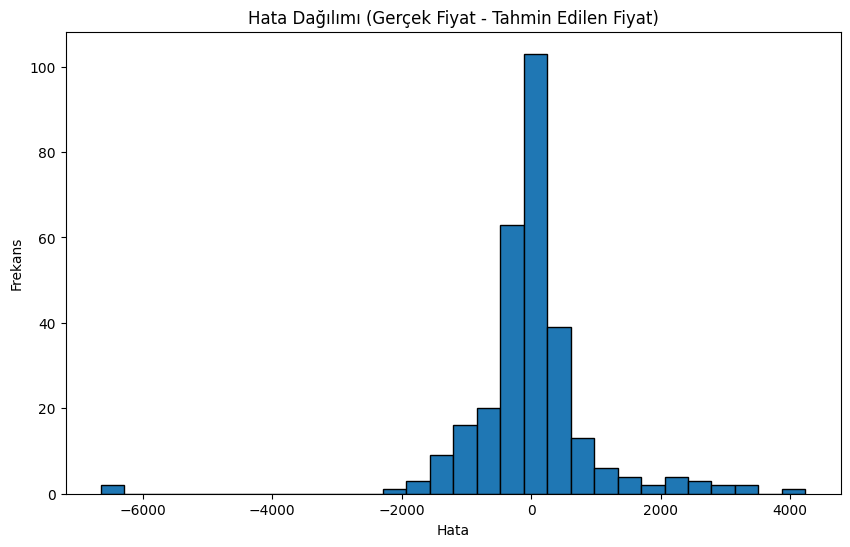

In [80]:
# Hata hesaplama
errors = y_test - y_pred

# Hata dağılımı
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Hata Dağılımı (Gerçek Fiyat - Tahmin Edilen Fiyat)')
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.show()


# Özelliklerin Önem Derecesi

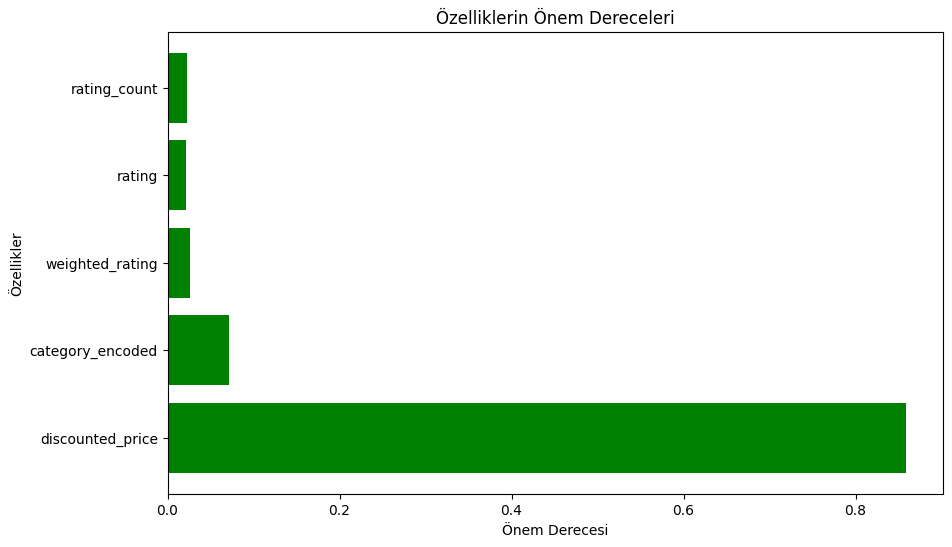

In [81]:


feature_importances = model.feature_importances_
features = X.columns

# Özelliklerin önem derecesini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='green')
plt.title('Özelliklerin Önem Dereceleri')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.show()
